<a href="https://colab.research.google.com/github/Nikoszav/MathForAI/blob/main/Ex3/CwEx3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN for MNIST dataset

code: https://medium.com/coinmonks/create-a-neural-network-in-pytorch-and-make-your-life-simpler-ec5367895199

## Import Libraries

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

## Import data

In [2]:
trainSet = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
validationSet = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [4]:
criterion = nn.CrossEntropyLoss()

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=trainSet, batch_size=10, shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validationSet, batch_size=10, shuffle=False)

## Create the ANN classifier

In [6]:
class Classifier(nn.Module):
    
  # Constructor
  def __init__(self,Layers, activationFun):
      super(Classifier, self).__init__()
      self.hidden = nn.ModuleList()
      self.activationFun = activationFun
      for input_size, output_size in zip(Layers, Layers[1:]):
          self.hidden.append(nn.Linear(input_size, output_size))

  
  # feedforward process
  def forward(self,x):
    lengthLayer = len(self.hidden)
    for (l, linear_transform) in zip(range(lengthLayer), self.hidden):
      if l < lengthLayer - 1:    
        if self.activationFun == "sigmoid":
          x = F.sigmoid(linear_transform(x)) 
        else: 
          x = F.relu(linear_transform(x)) 
      else:
        yPred = linear_transform(x)
    return yPred

## Create the fit method

In [7]:
def fit(model, criterion, train_loader, validation_loader, optimizer, epochs):
    iteration = 0
    trainingAcc = []
    trainingLoss = []
    validationAcc = []
    validationLoss = []
    epoch = 0
    stopFlag = False
    while epoch <= epochs and stopFlag == False:
        trAcc = 0
        for iteration, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()                                   # clear gradients
            z = model(x.view(-1, 784))                              # compute z vector
            loss = criterion(z, y)                                  # define loss
            loss.backward()                                         # backward process is called
            optimizer.step()                                        # optimize the weights
           
            _, label = torch.max(z, 1)
            trAcc += (label == y).sum().item()  
        
        trainingLoss.append(loss.data.item())                     # store training loss for future reference
        accuracy = 100 * (trAcc / len(trainSet))                  # calculate accuracy 
        trainingAcc.append(accuracy)                              # store validation accuracy for future reference

        print("After " ,epoch, " epochs the training accuracy is: ", trainingAcc[-1] )        
        print("After " ,epoch, " epochs the training loss is: ", trainingLoss[-1] )
        
        acc = 0
        for x, y in validation_loader:                              # validation process
            z = model(x.view(-1, 28 * 28))  
            valLoss = criterion(z, y)  

            
            _, label = torch.max(z, 1)            
            acc += (label == y).sum().item()                        # calcualte acc
        
        validationLoss.append(valLoss.data.item()) 
        accuracy = 100 * (acc / len(validationSet))                 #calculate accuracy 
        validationAcc.append(accuracy)                              # store validation accuracy for future reference
        
        print("After " ,epoch, " epochs the validation accuracy is: ", validationAcc[-1] )
        print("After " ,epoch, " epochs the validation loss is: ", validationLoss[-1] )
        epoch += 1
        
        if accuracy >=95.0:
          stopFlag = True
          print("Training stopped after " ,epoch, "epochs")

    return trainingAcc, trainingLoss, validationAcc, validationLoss, epoch                            

## Define the hyperparameters

In [8]:
Layer = [784, 50, 50, 10]
activationFunction = "sigmoid"
learning_rate = 0.01
epochs = 30

## Fit the model to our dataset

In [9]:
model = Classifier(Layer, activationFunction)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainingAcc, trainingLoss, validationAcc, validationLoss, stopEpoch   = fit(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


After  0  epochs the training accuracy is:  17.9
After  0  epochs the training loss is:  2.1779446601867676
After  0  epochs the validation accuracy is:  32.84
After  0  epochs the validation loss is:  2.139194965362549
After  1  epochs the training accuracy is:  54.97833333333333
After  1  epochs the training loss is:  0.8593817949295044
After  1  epochs the validation accuracy is:  71.77
After  1  epochs the validation loss is:  0.8344858288764954
After  2  epochs the training accuracy is:  79.4
After  2  epochs the training loss is:  0.48165392875671387
After  2  epochs the validation accuracy is:  83.95
After  2  epochs the validation loss is:  0.4410378038883209
After  3  epochs the training accuracy is:  85.27833333333334
After  3  epochs the training loss is:  0.43530169129371643
After  3  epochs the validation accuracy is:  87.02
After  3  epochs the validation loss is:  0.3442198932170868
After  4  epochs the training accuracy is:  87.75500000000001
After  4  epochs the traini

In [10]:
activationFunction = "relu"
model = Classifier(Layer, activationFunction)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainingAcc1, trainingLoss1, validationAcc1, validationLoss1, stopEpoch1 = fit(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

After  0  epochs the training accuracy is:  82.44666666666667
After  0  epochs the training loss is:  0.1188189759850502
After  0  epochs the validation accuracy is:  92.16
After  0  epochs the validation loss is:  0.08961441367864609
After  1  epochs the training accuracy is:  92.91333333333334
After  1  epochs the training loss is:  0.049526672810316086
After  1  epochs the validation accuracy is:  94.0
After  1  epochs the validation loss is:  0.03366703540086746
After  2  epochs the training accuracy is:  94.69666666666666
After  2  epochs the training loss is:  0.2479158192873001
After  2  epochs the validation accuracy is:  95.22
After  2  epochs the validation loss is:  0.0058342041447758675
Training stopped after  3 epochs


## Create different plots

In [11]:
evaluation = {}
evaluation["trainAccSigmoid"] = trainingAcc
evaluation["trainAccRelu"] = trainingAcc1

evaluation["trainLossSigmoid"] = trainingLoss
evaluation["trainLossRelu"] = trainingLoss1

evaluation["validationAccSigmoid"] = validationAcc
evaluation["validationAccRelu"] = validationAcc1

evaluation["validationLossSigmoid"] = validationLoss
evaluation["validationLossRelu"] = validationLoss1


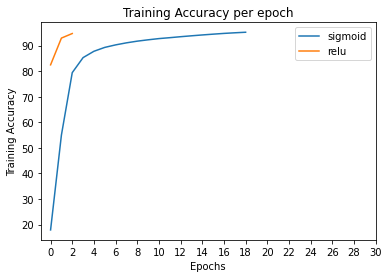

In [12]:
plt.plot(evaluation["trainAccSigmoid"], label='sigmoid')
plt.plot(evaluation["trainAccRelu"], label='relu')
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,32,2))
plt.title('Training Accuracy per epoch')
plt.legend()

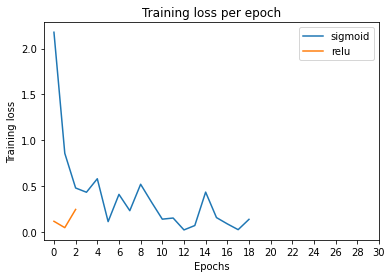

In [13]:
plt.plot(evaluation["trainLossSigmoid"], label='sigmoid')
plt.plot(evaluation["trainLossRelu"], label='relu')
plt.ylabel('Training loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,32,2))
plt.title('Training loss per epoch')
plt.legend()

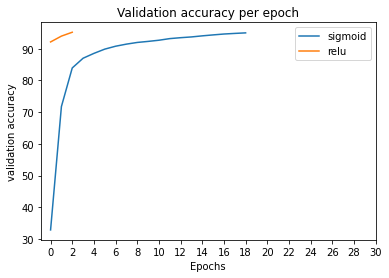

In [14]:
plt.plot(evaluation["validationAccSigmoid"], label = 'sigmoid')
plt.plot(evaluation["validationAccRelu"], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xticks(np.arange(0,32,2))
plt.xlabel('Epochs')   
plt.title('Validation accuracy per epoch')
plt.legend()

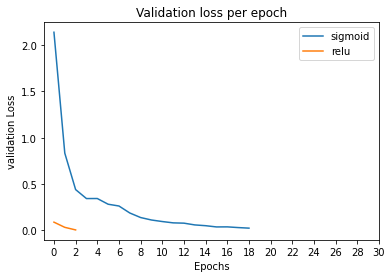

In [15]:
plt.plot(evaluation["validationLossSigmoid"], label = 'sigmoid')
plt.plot(evaluation["validationLossRelu"], label = 'relu') 
plt.ylabel('validation Loss')
plt.xticks(np.arange(0,32,2))
plt.xlabel('Epochs')   
plt.title('Validation loss per epoch')
plt.legend()

# Start of CNN

## Import dataser

In [16]:
composed = transforms.Compose([transforms.Resize((16, 16)), transforms.ToTensor()])

trainSet = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

validationSet = dsets.MNIST(root='./data', train=False, download=True, transform=composed)


In [17]:
train_loader = torch.utils.data.DataLoader(dataset=trainSet, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validationSet, batch_size=5000)

## Create the CNN classifier

In [18]:
'''
This class will create the cnn classifier. 
'''
class CNN(nn.Module):
    
    # initiliaze the cnn 
    def __init__(self, out_1, out_2):
    
      super(CNN, self).__init__()
      self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)#kernel size = 5, padding = 2
      self.maxpool1=nn.MaxPool2d(kernel_size=2) #max pooling layer 
      self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
      self.maxpool2=nn.MaxPool2d(kernel_size=2)
      self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
  
    # forward process for the cnn
    def forward(self, x):
        x = self.cnn1(x)  #convolution layer 1
        x = torch.relu(x) #follow by activation function(relu)
        x = self.maxpool1(x) #follow by a max pool layer 1
        x = self.cnn2(x)  #convolution layer 2
        x = torch.relu(x) #follow by activation function(relu)
        x = self.maxpool2(x) #follow by a max pool layer 1
        x = x.view(x.size(0), -1)#flattern 
        x = self.fc1(x)#fully conneted layer
        return x
    
    # activation process to connect all the layers of the cnn 
    def activations(self, x):
       
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        output = self.maxpool1(a1)
        
        z2 = self.cnn2(output)
        a2 = torch.relu(z2)
        output1 = self.maxpool2(a2)
        output = output.view(output.size(0),-1)
        return z1, a1, z2, a2, output1,output

In [19]:
# function to train the model 
'''
similar train function with the one in the ann
'''
def fit(epochs):
  valLen = len(validationSet)
  trainLen = len(trainSet)
  
  trainingAcc = []
  trainingLoss = []

  validationAcc = []
  validationLoss = []
  
  
  for epoch in range(epochs):
    trainLoss = 0
    valLoss = 0
    Tacc = 0
    Vacc = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        trainLoss += loss.data.item()
        _, yhat = torch.max(z.data, 1)            
        Tacc += (yhat == y).sum().item()

    trainingAccuracy = Tacc / trainLen
    trainingAcc.append(trainingAccuracy)
    trainingLoss.append(trainLoss)

    #test on the validation set  
    for x_test, y_test in validation_loader:
      z = model(x_test)
      loss = criterion(z, y_test)
      valLoss += loss.data.item()
      _, yhat = torch.max(z.data, 1)            
      Vacc += (yhat == y_test).sum().item()
    
        
    validationAccuracy = Vacc / valLen
    validationAcc.append(validationAccuracy)
    validationLoss.append(valLoss)  
    print("Epoch: ", epoch, "train accuracy is ", trainingAccuracy)
    print("Epoch: ", epoch, "validation accuracy is ", validationAccuracy)
  return trainingAcc, trainingLoss, validationAcc, validationLoss
  
  


In [20]:
# create the cnn model 
model = CNN(16, 32)

In [ ]:
#define the parameters and fit the model to the trainset
criterion = nn.CrossEntropyLoss()
learningRate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)
epochs=10
trainingAcc, trainingLoss, validationAcc, validationLoss = fit(epochs)

Epoch:  0 train accuracy is  0.47486666666666666
Epoch:  0 validation accuracy is  0.7365
Epoch:  1 train accuracy is  0.8219833333333333
Epoch:  1 validation accuracy is  0.8614
Epoch:  2 train accuracy is  0.8898833333333334
Epoch:  2 validation accuracy is  0.8956
Epoch:  3 train accuracy is  0.9134
Epoch:  3 validation accuracy is  0.9158
Epoch:  4 train accuracy is  0.928
Epoch:  4 validation accuracy is  0.9275
Epoch:  5 train accuracy is  0.9381666666666667
Epoch:  5 validation accuracy is  0.9375
Epoch:  6 train accuracy is  0.9450833333333334
Epoch:  6 validation accuracy is  0.9448
Epoch:  7 train accuracy is  0.9503833333333334
Epoch:  7 validation accuracy is  0.95
Epoch:  8 train accuracy is  0.95455
Epoch:  8 validation accuracy is  0.9531


In [ ]:
for x_test, y_test in validation_loader:
  z = model(x_test)
  _, yhat = torch.max(z.data, 1)  

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(yhat, y_test)

In [ ]:
#THE CONFUSION MATRIX OF MY BEST MODEL
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Plot graphs

In [ ]:
plt.plot(validationLoss, label='CNN')
plt.ylabel('Validation loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,10,1))
plt.title('Validation loss per epoch')
plt.legend()

In [ ]:
plt.plot(validationAcc, label='CNN')
plt.ylabel('Validation accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0,10,1))
plt.title('Validation accuracy per epoch')
plt.legend()